In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [16]:
df_feat.head(1)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3,
                                                     random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    error.append(np.mean(y_test != predict))

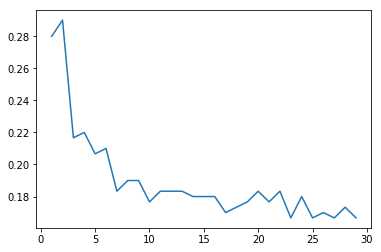

In [23]:
sns.lineplot(range(1,30), error)

In [34]:
knn = KNeighborsClassifier(12)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[128  24]
 [ 31 117]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.83      0.79      0.81       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

